In [45]:
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim


# Data properties
N = 64
N_FEAT = 2
N_SAMPLES = N ** N_FEAT
NOISE_AMP = 0.0

# Hyper-parameters
BATCH_SIZE = 128
LR = 1e-3
EPOCHS = 200
HIDDEN_SZ = 64

device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

print(N_SAMPLES)


cuda
4096


In [46]:
torch.manual_seed(0)

# Generate data
x = torch.linspace(-3.14, 3.14, N)
xgrids = torch.meshgrid((x,) * N_FEAT, indexing='ij')
X = torch.stack([g.reshape(-1) for g in xgrids], dim=1)

y = torch.sin(X).prod(dim=1).reshape(-1, 1)
y += NOISE_AMP * torch.randn_like(y)

dataset = torch.utils.data.TensorDataset(X, y)
loader = torch.utils.data.DataLoader(
    dataset, batch_size=BATCH_SIZE, shuffle=True)

# Define the model
model = nn.Sequential(
    nn.Linear(N_FEAT, HIDDEN_SZ),
    nn.Tanh(),
    nn.Linear(HIDDEN_SZ, HIDDEN_SZ),
    nn.Tanh(),
    nn.Linear(HIDDEN_SZ, 1)
).to(device)

# Loss + optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=LR)

# Training loop
for epoch in range(1, EPOCHS + 1):
    epoch_loss = 0.0
    for xb, yb in loader:
        xb, yb = xb.to(device), yb.to(device)

        pred = model(xb)
        loss = criterion(pred, yb)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item() * xb.size(0)

    if epoch % 20 == 0 or epoch == 1:
        print(f'Epoch {epoch:3d}/{EPOCHS},'
              f'MSE = {epoch_loss / N_SAMPLES:.5f}', flush=True)


Epoch   1/200,MSE = 0.19035
Epoch  20/200,MSE = 0.00919
Epoch  40/200,MSE = 0.00099
Epoch  60/200,MSE = 0.00051
Epoch  80/200,MSE = 0.00027
Epoch 100/200,MSE = 0.00028
Epoch 120/200,MSE = 0.00019
Epoch 140/200,MSE = 0.00020
Epoch 160/200,MSE = 0.00014
Epoch 180/200,MSE = 0.00015
Epoch 200/200,MSE = 0.00028


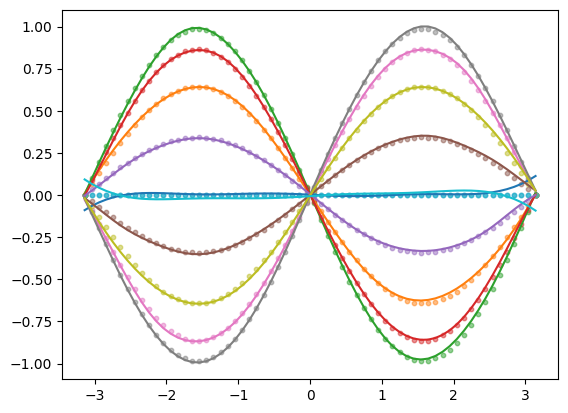

In [50]:
# Evaluate / visualize
model.eval()
with torch.no_grad():
    yhat = model(X.to(device)).cpu()

# Get default plot colors
cols = plt.rcParams['axes.prop_cycle'].by_key()['color']

x_ = x.numpy()
Y = y.reshape(N, N).numpy()
Yhat = yhat.reshape(N, N).numpy()

plt.figure()
idx = np.linspace(0, N - 1, 10, dtype=int)
for n, ind in enumerate(idx):
    plt.scatter(x_, Y[ind, :], s=10, alpha=0.5, c=cols[n])
    plt.plot(x_, Yhat[ind, :], color=cols[n])
plt.show()